# Strock Price prediction using LSTM

In [1]:
#!pip install pandas_datareader
#!pip install tensorflow
#!docker run -it -p 8888:8888 tensorflow/tensorflow:latest-jupyter
#!pip install keras


In [2]:
import pandas_datareader as pdr

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

In [3]:
#key= 'enter your key'

In [4]:
#df= pdr.get_data_tiingo('AAPL', api_key= key) 
#extracting stock data from TIINGO using API

In [5]:
#df.to_csv('AAPL.csv') #converting the exctracted the data to csv

In [6]:
df= pd.read_csv('AAPL.csv') #reading the csv

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-13 00:00:00+00:00,115.15,116.40,114.54,116.04,48535789,106.396396,107.551372,105.832768,107.218739,48535789,0.0,1.0
1,AAPL,2015-08-14 00:00:00+00:00,115.96,116.31,114.01,114.32,42929516,107.144821,107.468214,105.343058,105.629492,42929516,0.0,1.0
2,AAPL,2015-08-17 00:00:00+00:00,117.16,117.65,115.50,116.04,40884745,108.253598,108.706348,106.719789,107.218739,40884745,0.0,1.0
3,AAPL,2015-08-18 00:00:00+00:00,116.50,117.44,116.01,116.43,34560708,107.643770,108.512312,107.191020,107.579092,34560708,0.0,1.0
4,AAPL,2015-08-19 00:00:00+00:00,115.01,116.52,114.68,116.10,48286510,106.267039,107.662250,105.962125,107.274178,48286510,0.0,1.0


In [8]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2020-08-04 00:00:00+00:00,438.66,443.16,433.55,436.53,43198092,437.852173,442.343886,432.751583,435.726095,43198092,0.00,1.0
1253,AAPL,2020-08-05 00:00:00+00:00,440.25,441.57,435.59,437.51,30497988,439.439245,440.756814,434.787826,436.704291,30497988,0.00,1.0
1254,AAPL,2020-08-06 00:00:00+00:00,455.61,457.65,439.19,441.62,50607225,454.770958,456.807201,438.381197,440.806722,50607225,0.00,1.0
1255,AAPL,2020-08-07 00:00:00+00:00,444.45,454.70,441.17,452.82,49511403,444.450000,454.700000,441.170000,452.820000,49511403,0.82,1.0
1256,AAPL,2020-08-10 00:00:00+00:00,450.91,455.10,440.00,450.40,53100856,450.910000,455.100000,440.000000,450.400000,53100856,0.00,1.0


In [9]:
df.shape

(1257, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1257 non-null   object 
 1   date         1257 non-null   object 
 2   close        1257 non-null   float64
 3   high         1257 non-null   float64
 4   low          1257 non-null   float64
 5   open         1257 non-null   float64
 6   volume       1257 non-null   int64  
 7   adjClose     1257 non-null   float64
 8   adjHigh      1257 non-null   float64
 9   adjLow       1257 non-null   float64
 10  adjOpen      1257 non-null   float64
 11  adjVolume    1257 non-null   int64  
 12  divCash      1257 non-null   float64
 13  splitFactor  1257 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.6+ KB


In [11]:
df1= df.reset_index()['close'] #creating a new df with only close price as we would be making prediction on close, we can do the same on open, high, low as well

In [12]:
df1.head()

0    115.15
1    115.96
2    117.16
3    116.50
4    115.01
Name: close, dtype: float64

In [13]:
df1.shape

(1257,)

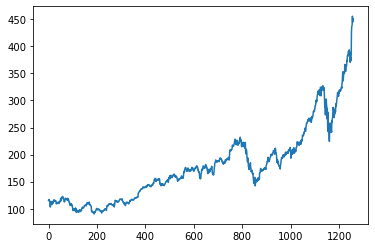

In [14]:
plt.plot(df1) #plotting close price

In [15]:
## LSTM are sensitive to the scale of the data, so we apply MinMax scaling

In [16]:
df1 = df1.values.reshape(len(df1),1) #converting to 2d

In [17]:
scaler= MinMaxScaler() #applying the scaling to df1
df1= scaler.fit_transform(df1)
df1

array([[0.06792236],
       [0.0701399 ],
       [0.07342514],
       ...,
       [1.        ],
       [0.96944726],
       [0.98713281]])

In [18]:
df1.shape

(1257, 1)

In [19]:
#Train test data splitting
#our data is time series data, here day 2 can be depended on day 1 or day  5 can be depended on day 1 3 4
#so we can say in time series data a particular day data can be depended on previous day data

#so we cannot split using train_test_split or CV techniques

training_size= int(len(df1)*0.65)  #here, taking 65% of data as training data
test_size= len(df1) - training_size  #here, test size would be total data minus training data, that is the remaining 35%

train_data, test_data= df1[0:training_size, :], df1[training_size:len(df1), :] #creating train and test data using the size


In [20]:
len(train_data), len(test_data)

(817, 440)

In [21]:
#converting an arrey of value into dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY= [], []
    for i in range(len(dataset)- time_step-1):             # 818-100-1= 717
        a= dataset[i:(i+time_step),0]        ###i=0, 0,1,2,3--------99 100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return np.array(dataX), np.array(dataY)

In [22]:
time_step= 100
X_train, y_train= create_dataset(train_data, time_step)
X_test, y_test= create_dataset(test_data, time_step)


In [23]:
X_train.shape, y_train.shape

((716, 100), (716,))

In [24]:
X_test.shape, y_test.shape

((339, 100), (339,))

In [25]:
#reshape input to be 3D data which is reqd in LSTM [sample, rime step, features]

X_train= X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_train.shape, X_test.shape

((716, 100, 1), (339, 100, 1))

In [26]:
# Libraries reqd for creating the stack LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import tensorflow as tf

In [27]:
model= Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(100,1)))
model.add(LSTM(50,return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer= 'adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=64, verbose= True)

Epoch 1/100
12/12 [==============================] - 6s 463ms/step - loss: 0.0138 - val_loss: 0.0511
Epoch 2/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 3/100
12/12 [==============================] - 3s 242ms/step - loss: 6.6507e-04 - val_loss: 0.0046
Epoch 4/100
12/12 [==============================] - 3s 243ms/step - loss: 5.3691e-04 - val_loss: 0.0031
Epoch 5/100
12/12 [==============================] - 3s 218ms/step - loss: 4.2747e-04 - val_loss: 0.0045
Epoch 6/100
12/12 [==============================] - 3s 241ms/step - loss: 3.1730e-04 - val_loss: 0.0027
Epoch 7/100
12/12 [==============================] - 3s 241ms/step - loss: 2.7946e-04 - val_loss: 0.0027
Epoch 8/100
12/12 [==============================] - 3s 227ms/step - loss: 2.8242e-04 - val_loss: 0.0027
Epoch 9/100
12/12 [==============================] - 3s 260ms/step - loss: 2.8592e-04 - val_loss: 0.0028
Epoch 10/100
12/12 [==============================] - 3s 219ms/

In [30]:
#prediction to check performance metrics

train_pred= model.predict(X_train)
test_pred= model.predict(X_test)

In [31]:
#transforming back to original form

train_pred= scaler.inverse_transform(train_pred)
test_pred= scaler.inverse_transform(test_pred)

In [32]:
#RMSE for train data

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_train, train_pred))

151.56620351850444

In [33]:
#RMSE for test data

np.sqrt(mean_squared_error(y_test, test_pred))

264.40950254267085

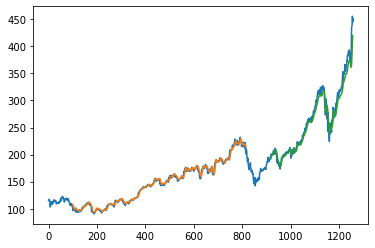

In [34]:
#plotting actual and predicted values

#shifting train prediction for plotting
look_back=100
train_pred_plot= np.empty_like(df1)
train_pred_plot[:, :]= np.nan
train_pred_plot[look_back:len(train_pred)+look_back, :] = train_pred

#shift test predictions for plotting
test_pred_plot= np.empty_like(df1)
test_pred_plot[:, :]= np.nan
test_pred_plot[len(train_pred)+(look_back*2)+1:len(df1)-1, :]= test_pred

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.show()

In [35]:
temp_input= test_data[340:].reshape(1,-1) 
temp_input.shape

(1, 100)

In [36]:
#predicting for future 30 days


temp_input= test_data[340:].reshape(1,-1) #converting shape to (1,100)

temp_input= temp_input[0].tolist()        #converting to a list
#temp_input     #test_data for previous 100 days, we will use this data for predicting next 30 days




predictions=[]                                
for i in range(1,31):                                                       
    if i == 1:                                                            #here we are taking i=1 because we would be predicting based on predefined 100 data points and from else part we would be predicting based on LIFO data points
        temp_input_arr= np.array(temp_input)                              #converting the list of 100 previous data into an array
        temp_input_arr= temp_input_arr.reshape(1, len(temp_input),1)      #reshaping array to 3d as per the requirement of tensorflow model
        y_hat1= model.predict(temp_input_arr)                             #predicting the value when i=1 using tensorflow model
        temp_input.extend(y_hat1[0].tolist())                             #extending and converting to list the y_hat predicted value to temp_input list
        predictions.extend(y_hat1[0].tolist())                            #storing the y_hat value to a 30 days prediction list
        print("day {} input {}". format(i,temp_input))
        print('prediction for day', i, y_hat1)
        print('======================================================')
        
    else:
        temp_input= temp_input[1:]                                       #transforming the temp_input list such that is has last 100 data points for the prediction of next day, means we are indexing is such a way that it removes the first element and adding the new prediction value
        temp_input_arr= np.array(temp_input)                             # again converting the list of 100 data into an array
        temp_input_arr= temp_input_arr.reshape(1, len(temp_input),1)     #reshaping array to 3d as per the requirement of tensorflow model
        y_hat1= model.predict(temp_input_arr)                            #predicting the value using tensorflow model
        temp_input.extend(y_hat1[0].tolist())                            #extending and converting to list the y_hat predicted value to temp_input list
        predictions.extend(y_hat1[0].tolist())                           #storing the y_hat value to a 30 days prediction list
        print("day {} input {}". format(i,temp_input))
        print('prediction for day', i, y_hat1)
        print('======================================================')


print('Predictions for next 30 days: ', '\n', predictions)

day 1 input [0.4228105237221782, 0.3802666520655954, 0.3669340487858297, 0.42855969556766227, 0.42483642237249164, 0.46020751772661317, 0.43091411832343207, 0.45026966353656206, 0.44884605907958497, 0.4122156213212145, 0.42322117885399846, 0.4135844717606154, 0.47124045226818534, 0.4629178415966272, 0.48109617543187233, 0.48635256111917213, 0.5007528677416706, 0.538533139869138, 0.5313603635666767, 0.5375475675527692, 0.5268979111342296, 0.5108276069756619, 0.48739288745311693, 0.5085553152462563, 0.505625975305938, 0.5273633202836259, 0.5279108604593863, 0.515344813425685, 0.5403947764667233, 0.5570126208010513, 0.5440632956443179, 0.5552604922386181, 0.5673063761053467, 0.5757111178032689, 0.584225367536343, 0.6017192761518877, 0.6150792564404414, 0.6052235332767543, 0.5949297779724587, 0.6001040326333946, 0.5950940400251868, 0.6149423713965012, 0.6099597557970816, 0.6266323541489858, 0.6201166260574371, 0.6257015358501931, 0.6197881019519809, 0.6235661291647275, 0.6239494072877598, 

day 9 input [0.44884605907958497, 0.4122156213212145, 0.42322117885399846, 0.4135844717606154, 0.47124045226818534, 0.4629178415966272, 0.48109617543187233, 0.48635256111917213, 0.5007528677416706, 0.538533139869138, 0.5313603635666767, 0.5375475675527692, 0.5268979111342296, 0.5108276069756619, 0.48739288745311693, 0.5085553152462563, 0.505625975305938, 0.5273633202836259, 0.5279108604593863, 0.515344813425685, 0.5403947764667233, 0.5570126208010513, 0.5440632956443179, 0.5552604922386181, 0.5673063761053467, 0.5757111178032689, 0.584225367536343, 0.6017192761518877, 0.6150792564404414, 0.6052235332767543, 0.5949297779724587, 0.6001040326333946, 0.5950940400251868, 0.6149423713965012, 0.6099597557970816, 0.6266323541489858, 0.6201166260574371, 0.6257015358501931, 0.6197881019519809, 0.6235661291647275, 0.6239494072877598, 0.6231007200153311, 0.6338051304514469, 0.6378843047608618, 0.6427574123251294, 0.6350918498644839, 0.660223943931886, 0.6655898376543379, 0.6944178279081228, 0.7186

day 14 input [0.4629178415966272, 0.48109617543187233, 0.48635256111917213, 0.5007528677416706, 0.538533139869138, 0.5313603635666767, 0.5375475675527692, 0.5268979111342296, 0.5108276069756619, 0.48739288745311693, 0.5085553152462563, 0.505625975305938, 0.5273633202836259, 0.5279108604593863, 0.515344813425685, 0.5403947764667233, 0.5570126208010513, 0.5440632956443179, 0.5552604922386181, 0.5673063761053467, 0.5757111178032689, 0.584225367536343, 0.6017192761518877, 0.6150792564404414, 0.6052235332767543, 0.5949297779724587, 0.6001040326333946, 0.5950940400251868, 0.6149423713965012, 0.6099597557970816, 0.6266323541489858, 0.6201166260574371, 0.6257015358501931, 0.6197881019519809, 0.6235661291647275, 0.6239494072877598, 0.6231007200153311, 0.6338051304514469, 0.6378843047608618, 0.6427574123251294, 0.6350918498644839, 0.660223943931886, 0.6655898376543379, 0.6944178279081228, 0.7186464806855203, 0.6722698277986147, 0.6802091603471405, 0.6916801270293208, 0.7165658280176308, 0.715224

day 18 input [0.538533139869138, 0.5313603635666767, 0.5375475675527692, 0.5268979111342296, 0.5108276069756619, 0.48739288745311693, 0.5085553152462563, 0.505625975305938, 0.5273633202836259, 0.5279108604593863, 0.515344813425685, 0.5403947764667233, 0.5570126208010513, 0.5440632956443179, 0.5552604922386181, 0.5673063761053467, 0.5757111178032689, 0.584225367536343, 0.6017192761518877, 0.6150792564404414, 0.6052235332767543, 0.5949297779724587, 0.6001040326333946, 0.5950940400251868, 0.6149423713965012, 0.6099597557970816, 0.6266323541489858, 0.6201166260574371, 0.6257015358501931, 0.6197881019519809, 0.6235661291647275, 0.6239494072877598, 0.6231007200153311, 0.6338051304514469, 0.6378843047608618, 0.6427574123251294, 0.6350918498644839, 0.660223943931886, 0.6655898376543379, 0.6944178279081228, 0.7186464806855203, 0.6722698277986147, 0.6802091603471405, 0.6916801270293208, 0.7165658280176308, 0.7152243545870178, 0.7156076327100502, 0.7101048539436582, 0.7351548169846963, 0.75612560

day 22 input [0.5108276069756619, 0.48739288745311693, 0.5085553152462563, 0.505625975305938, 0.5273633202836259, 0.5279108604593863, 0.515344813425685, 0.5403947764667233, 0.5570126208010513, 0.5440632956443179, 0.5552604922386181, 0.5673063761053467, 0.5757111178032689, 0.584225367536343, 0.6017192761518877, 0.6150792564404414, 0.6052235332767543, 0.5949297779724587, 0.6001040326333946, 0.5950940400251868, 0.6149423713965012, 0.6099597557970816, 0.6266323541489858, 0.6201166260574371, 0.6257015358501931, 0.6197881019519809, 0.6235661291647275, 0.6239494072877598, 0.6231007200153311, 0.6338051304514469, 0.6378843047608618, 0.6427574123251294, 0.6350918498644839, 0.660223943931886, 0.6655898376543379, 0.6944178279081228, 0.7186464806855203, 0.6722698277986147, 0.6802091603471405, 0.6916801270293208, 0.7165658280176308, 0.7152243545870178, 0.7156076327100502, 0.7101048539436582, 0.7351548169846963, 0.7561256057163195, 0.7384126810304706, 0.7514988912311441, 0.7208092643797739, 0.7431215

day 27 input [0.5279108604593863, 0.515344813425685, 0.5403947764667233, 0.5570126208010513, 0.5440632956443179, 0.5552604922386181, 0.5673063761053467, 0.5757111178032689, 0.584225367536343, 0.6017192761518877, 0.6150792564404414, 0.6052235332767543, 0.5949297779724587, 0.6001040326333946, 0.5950940400251868, 0.6149423713965012, 0.6099597557970816, 0.6266323541489858, 0.6201166260574371, 0.6257015358501931, 0.6197881019519809, 0.6235661291647275, 0.6239494072877598, 0.6231007200153311, 0.6338051304514469, 0.6378843047608618, 0.6427574123251294, 0.6350918498644839, 0.660223943931886, 0.6655898376543379, 0.6944178279081228, 0.7186464806855203, 0.6722698277986147, 0.6802091603471405, 0.6916801270293208, 0.7165658280176308, 0.7152243545870178, 0.7156076327100502, 0.7101048539436582, 0.7351548169846963, 0.7561256057163195, 0.7384126810304706, 0.7514988912311441, 0.7208092643797739, 0.74312152654201, 0.7513893831959921, 0.7495003695896187, 0.7495003695896187, 0.7761655761491499, 0.772989843

In [37]:
type(predictions)

list

In [38]:
data_index= np.arange(1,101)
pred_index= np.arange(101,131)

predictions= np.array(predictions).reshape(-1,1)

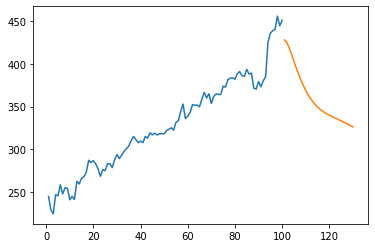

In [39]:
inv_data= scaler.inverse_transform(df1[1157:])
pred_data= scaler.inverse_transform(predictions)
plt.plot(data_index, inv_data)
plt.plot(pred_index, pred_data)

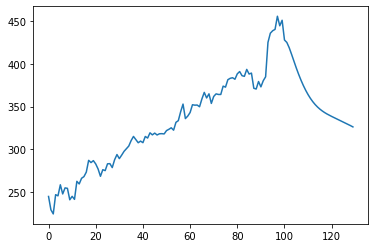

In [40]:
dt= inv_data.reshape(-1,).tolist()
dt.extend(pred_data.reshape(-1).tolist())

df4= pd.DataFrame()
df4['Stock Price']= dt
df4.index= df4.index + 1
df4.index.set_names('Days', inplace= True)

plt.plot(dt)

In [41]:

print('Prediction of Apple stock for next 30 days : ')
df3= pd.DataFrame()
df3['Day']= np.arange(1,31)
df3['Predicted Stock Price']= pred_data.reshape(-1,)
df3.set_index('Day', inplace=True)
df3

Prediction of Apple stock for next 30 days : 


,Predicted Stock Price
Day,
1,427.817528
2,424.964509
3,418.798869
4,411.108464
5,403.022618
6,395.126817
7,387.687680
8,380.816417
9,374.556679


In [42]:
print(dt)

[244.78000000000003, 229.24, 224.37, 246.88, 245.52, 258.44, 247.74, 254.81, 254.29, 240.91, 244.93, 241.40999999999997, 262.47, 259.43, 266.07, 267.99, 273.25, 287.05, 284.43, 286.69, 282.8, 276.93, 268.37, 276.1, 275.03, 282.97, 283.17, 278.58, 287.73, 293.8, 289.07, 293.16, 297.56, 300.63, 303.74, 310.13, 315.01, 311.41, 307.65, 309.54, 307.71, 314.96, 313.14, 319.23, 316.85, 318.89, 316.73, 318.11, 318.25, 317.94, 321.85, 323.34, 325.12, 322.32, 331.5, 333.46, 343.99, 352.84, 335.9, 338.8, 342.99, 352.08, 351.59, 351.73, 349.72, 358.87, 366.53000000000003, 360.06, 364.84, 353.63, 361.78, 364.8, 364.11, 364.11, 373.84999999999997, 372.69, 381.36999999999995, 383.00999999999993, 383.68, 381.91, 388.2300000000001, 390.8999999999999, 386.09000000000003, 385.31, 393.43, 388.0, 389.09, 371.38, 370.46, 379.24, 373.01000000000005, 380.16, 384.76, 425.04, 435.75, 438.65999999999997, 440.25, 455.60999999999996, 444.45, 450.90999999999997, 427.8175280714035, 424.9645093500614, 418.79886945009